In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output

# Define grid size
GRID_SIZE = (20, 20)

# Initialize fuel types (0=Grass, 1=Shrubs, 2=Trees, 3=Buildings)
fuel_types = np.random.choice([0, 1, 2, 3], size=GRID_SIZE, p=[0.4, 0.3, 0.2, 0.1])

# Define fuel colors
fuel_colors = {0: "lightgreen", 1: "darkgreen", 2: "saddlebrown", 3: "gray"}

# Create color grid for initial terrain
terrain_colors = np.vectorize(fuel_colors.get)(fuel_types)

# Initialize fire state (0=Unburned, 1=Burning, 2=Burned)
fire_state = np.zeros(GRID_SIZE)

# Generate slope-based elevation
slope = np.random.uniform(-10, 10, GRID_SIZE)
elevation = (slope - slope.min()) / (slope.max() - slope.min()) * 50

# Ignite a fire at a random location
fire_x, fire_y = np.random.randint(0, GRID_SIZE[0]), np.random.randint(0, GRID_SIZE[1])
fire_state[fire_x, fire_y] = 1

In [9]:
# Store fire spread history for animation
fire_state_history = []

# Run fire spread simulation for multiple steps
for step in range(20):
    new_fire_state = fire_state.copy()

    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            if fire_state[x, y] == 1:  # Burning cell
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < GRID_SIZE[0] and 0 <= ny < GRID_SIZE[1]:  # Stay within bounds
                        if fire_state[nx, ny] == 0:  # If neighbor is unburned
                            if np.random.rand() < 0.5:  # Spread probability
                                new_fire_state[nx, ny] = 1  # Set neighbor on fire

                new_fire_state[x, y] = 2  # Mark as burned

    fire_state = new_fire_state.copy()
    fire_state_history.append(fire_state.copy())  # Store snapshot

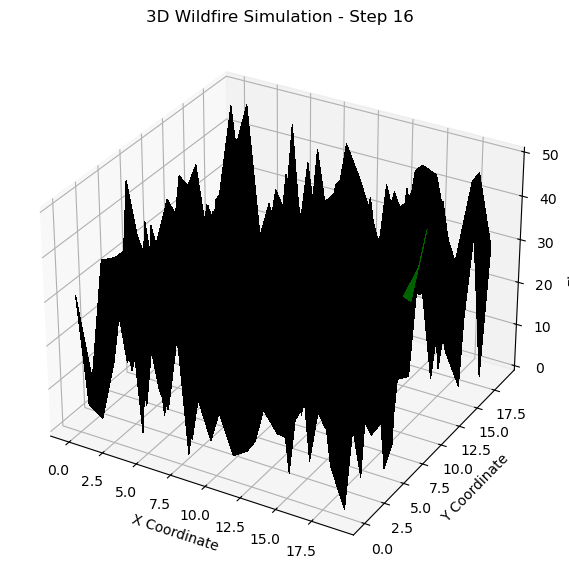

In [ ]:
# Create a figure for 3D animation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Display fire spread step by step
for step in range(len(fire_state_history)):
    ax.clear()  # Clear previous frame

    # Get current fire state
    fire_state = fire_state_history[step]

    # Create updated fire color grid
    fire_colored_grid = np.empty(fire_state.shape, dtype=object)

    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            if fire_state[x, y] == 0:  # Unburned, keep fuel color
                fire_colored_grid[x, y] = terrain_colors[x, y]
            elif fire_state[x, y] == 1:  # Fire
                fire_colored_grid[x, y] = "orange"
            else:  # Burned
                fire_colored_grid[x, y] = "black"

    # Create 3D terrain with fire visualization
    X, Y = np.meshgrid(np.arange(GRID_SIZE[0]), np.arange(GRID_SIZE[1]))
    ax.plot_surface(X, Y, elevation, facecolors=fire_colored_grid, rstride=1, cstride=1, linewidth=0, antialiased=False, shade=True)

    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Elevation")
    ax.set_title(f"3D Wildfire Simulation - Step {step+1}")

    # Display the frame
    clear_output(wait=True)
    display(fig)
    plt.pause(0.5)  # Pause for animation effect

plt.show()  # Final frame display